# Exploration off the used audio augmentation methods

## Setup

In [103]:
from os.path import join

def setup_file_system(in_colab):
    if in_colab:
        from google.colab import drive

        # Set the base and mount path
        MOUNT_PATH_DRIVE = '/content/drive'
        BASE_PATH = join(
            MOUNT_PATH_DRIVE, 
            "MyDrive/project_asr"
        )

        # Mount the google drive
        drive.mount(MOUNT_PATH_DRIVE)

        return BASE_PATH

    else:
        return "/workspaces/project_automated_sound_recognition"

In [104]:
import sys
from os import chdir
from os.path import join

# Method to check if the notebook is running in colab or local
IN_COLAB = 'google.colab' in sys.modules

# Set the base path of the project
BASE_PATH = setup_file_system(IN_COLAB)

# Set the base path of the project
chdir(join(BASE_PATH, "src/"))

In [105]:
%load_ext autoreload
%autoreload 2

from os.path import join
import matplotlib.pyplot as plt
import torch

from dataset.audio_sample_dataset import AudioSampleDataset
from util import config, feat_extract

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
# Create instance of feature extractor helper function
feature_extractor = feat_extract.FE(config.featconf)

# Set the audio file to get
audio_file_idx = torch.Tensor([3]).long()

## No augmentation

In [107]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': False,
    },
    'noise': {
        'enabled': False,
    },
    'mixup': {
        'enabled': False,
    },
    'freq_mask': {
        'enabled': False,
    },
    'time_mask': {
        'enabled': False,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


Text(0, 0.5, 'mel')

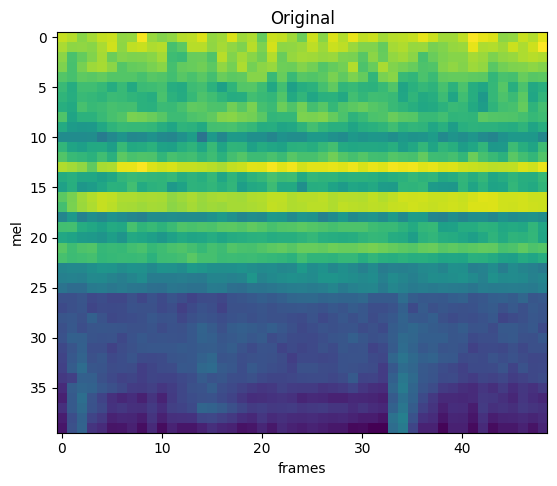

In [110]:
# Get original sample
waveform, label = train_dataset.__getitem__(3)
print(label)

# Generate a plot of the four waveforms side by side
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(9.2, 5.2)

ax1.imshow(waveform[0])
ax1.set_title('Original')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

## Mixup

In [55]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': False,
    },
    'noise': {
        'enabled': False,
    },
    'mixup': {
        'enabled': True,
        'p': 1.0,
        'alpha': 0.2,
    },
    'freq_mask': {
        'enabled': False,
    },
    'time_mask': {
        'enabled': False,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [56]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

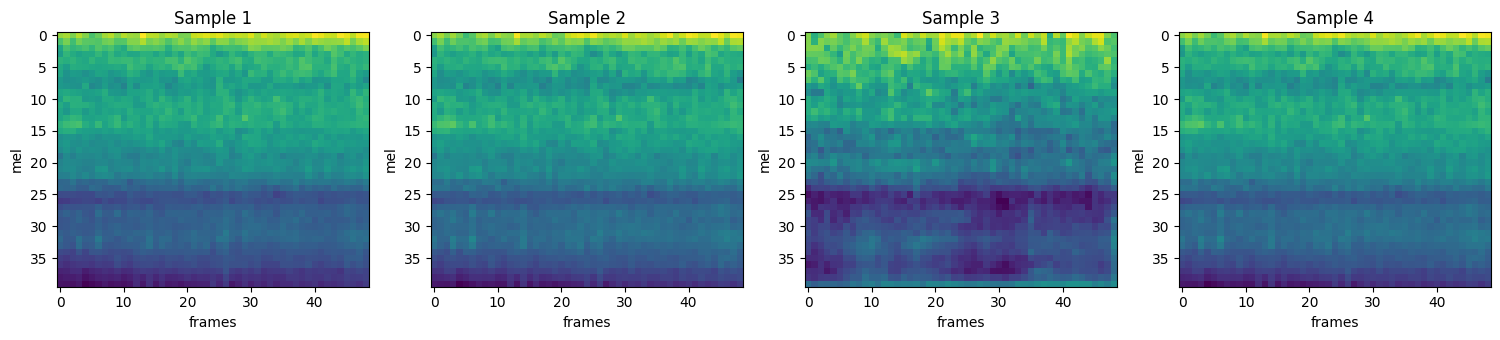

In [57]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()

## Noise

In [58]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': False,
    },
    'noise': {
        'enabled': True,
        'p': 1.0,
        'min_amplitude': 0.001,
        'max_amplitude': 0.015,
    },
    'mixup': {
        'enabled': False,
    },
    'freq_mask': {
        'enabled': False,
    },
    'time_mask': {
        'enabled': False,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [59]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

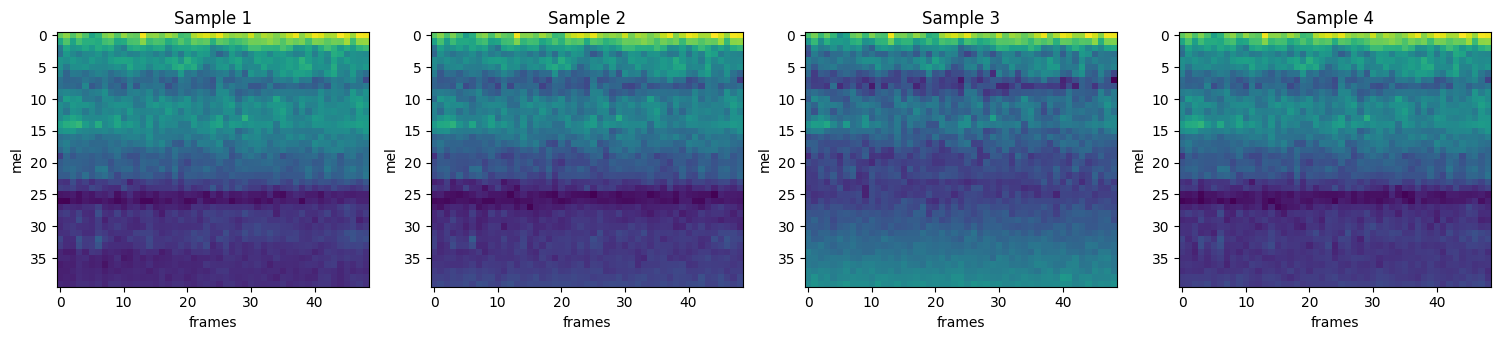

In [60]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()

## Pitch shift

In [61]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': True,
        'p': 1.0,
        'min_semitones': -4, 
        "max_semitones": 4,
    },
    'noise': {
        'enabled': False,
    },
    'mixup': {
        'enabled': False,
    },
    'freq_mask': {
        'enabled': False,
    },
    'time_mask': {
        'enabled': False,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [62]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

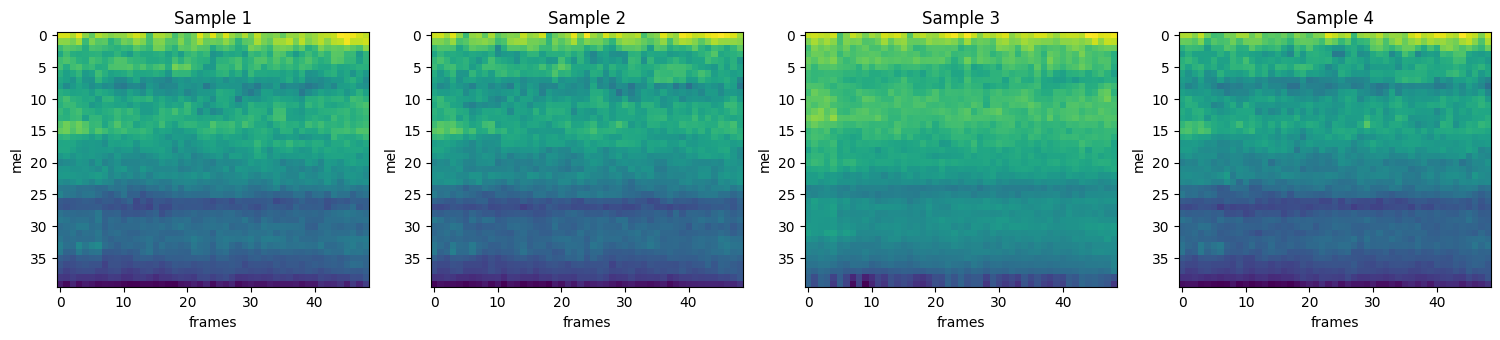

In [63]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()

## Frequency mask

In [64]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': False,
    },
    'noise': {
        'enabled': False,
    },
    'mixup': {
        'enabled': False,
    },
    'freq_mask': {
        'enabled': True,
        'p': 1.0,
        'freq_mask_param': 5,
    },
    'time_mask': {
        'enabled': False,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [65]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

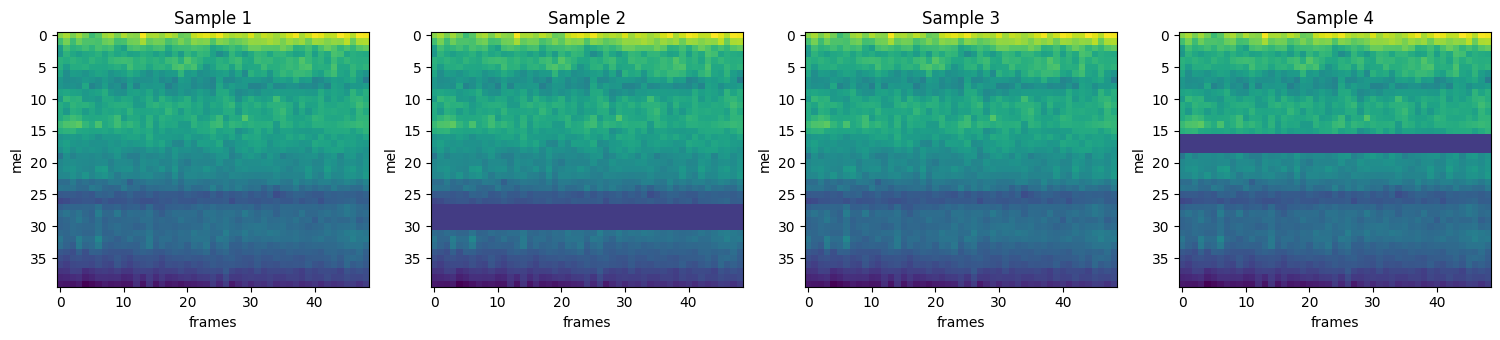

In [66]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()

## Time mask

In [67]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': False,
    },
    'noise': {
        'enabled': False,
    },
    'mixup': {
        'enabled': False,
    },
    'freq_mask': {
        'enabled': False,
    },
    'time_mask': {
        'enabled': True,
        'p': 1.0,
        'time_mask_param': 10,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [68]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

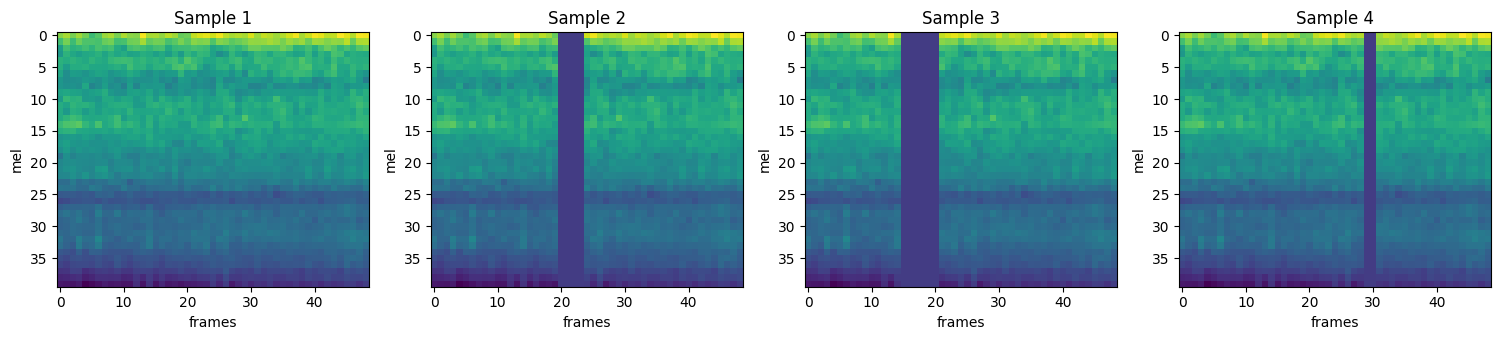

In [69]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()

## All augments

In [70]:
# Set the augmentations
augmentations = {
    'pitch_shift': {
        'enabled': True,
        'p': 0.25,
        'min_semitones': -4, 
        "max_semitones": 4,
    },
    'noise': {
        'enabled': True,
        'p': 0.25,
        'min_amplitude': 0.001,
        'max_amplitude': 0.015,
    },
    'mixup': {
        'enabled': True,
        'p': 0.25,
        'alpha': 0.2,
    },
    'freq_mask': {
        'enabled': True,
        'p': 0.25,
        'freq_mask_param': 5,
    },
    'time_mask': {
        'enabled': True,
        'p': 0.25,
        'time_mask_param': 10,
    }
}

# Set the dataset
train_dataset = AudioSampleDataset(
        join(BASE_PATH, config.TRAIN_DATA_PATH),
        augmentations
    )

In [71]:
# Get the same file four times
returned_waveforms = []
for i in range(0,5):
    waveform, label = train_dataset.__getitem__(audio_file_idx)
    returned_waveforms.append(waveform)

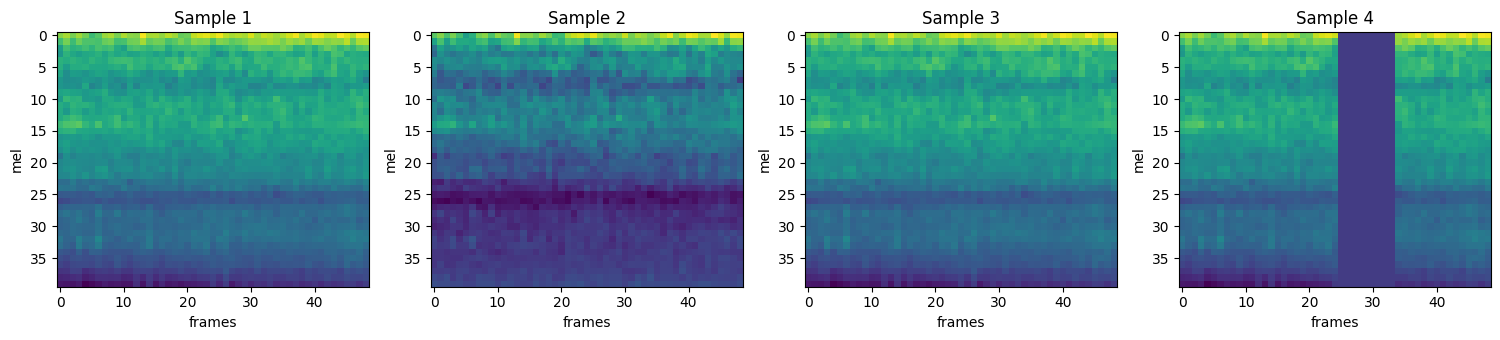

In [72]:
# Generate a plot of the four waveforms side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(returned_waveforms[0][0])
ax1.set_title('Sample 1')
ax1.set_xlabel('frames')
ax1.set_ylabel('mel')

ax2.imshow(returned_waveforms[1][0])
ax2.set_title('Sample 2')
ax2.set_xlabel('frames')
ax2.set_ylabel('mel')

ax3.imshow(returned_waveforms[2][0])
ax3.set_title('Sample 3')
ax3.set_xlabel('frames')
ax3.set_ylabel('mel')

ax4.imshow(returned_waveforms[3][0])
ax4.set_title('Sample 4')
ax4.set_xlabel('frames')
ax4.set_ylabel('mel')

plt.show()